# 1. Data Cleaning

In [276]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import linear_model
import matplotlib.pyplot as plt
import nltk as nltk
from politeness.api_util import get_scores_strategies_token_indices

%matplotlib inline

# New Rating data 
codings=pd.read_csv('PolCodings600.csv', index_col=0, parse_dates=True)

headers=list(codings.columns.values)
en_headers=[]
ch_headers=[]

for h in headers:
    if h.startswith('EN'):
        en_headers.append(h)
    elif h.startswith('CH'):
        ch_headers.append(h)

In [227]:
#calculating z scores by individuals 

en_headers_zscore=[]
ch_headers_zscore=[]

for col in en_headers:
    col_zscore=col+'_zscore'
    codings[col_zscore]=(codings[col]-codings[col].mean())/codings[col].std(ddof=0)
    en_headers_zscore.append(col_zscore)
    

for col in ch_headers:
    col_zscore=col+'_zscore'
    codings[col_zscore]=(codings[col]-codings[col].mean())/codings[col].std(ddof=0)
    ch_headers_zscore.append(col_zscore)

# codings.columns.values

In [228]:
#Get rid of Nan in EN
en=codings[en_headers].values
en_z=codings[en_headers_zscore].values
nonanen=[]
nonanen_z=[]

for i in range(600):
    l= en[i][~np.isnan(en[i])]
    k= en_z[i][~np.isnan(en_z[i])]
    nonanen.append(l)
    nonanen_z.append(k)
    
print(np.shape(nonanen))
print(np.shape(nonanen_z))

print(en[599])
print(en_z[599])

print(nonanen[599])
print(nonanen_z[599])

ena=np.nanmean(en,axis=1)
ena_z=np.nanmean(en_z,axis=1)

print(ena[599])
print(ena_z[599])


(600,)
(600,)
[  9.   2.   1.  -1.   2.   3.   0.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan]
[ 1.1412692   0.70613313  0.17653847 -0.47671629  0.38633163  0.80630353
 -0.25182203         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan]
[ 9.  2.  1. -1.  2.  3.  0.]
[ 1.1412692   0.70613313  0.17653847 -0.47671629  0.38633163  0.80630353
 -0.25182203]
2.28571428571
0.355433947845


In [73]:
#Get rid of Nan in CH
ch=codings[ch_headers].values
ch_z=codings[ch_headers_zscore].values
nonanch=[]
nonanch_z=[]
# print(ch)
# print(ch_z)
for i in range(600):
    l= ch[i][~np.isnan(ch[i])]
    k= ch_z[i][~np.isnan(ch_z[i])]
    nonanch.append(l)
    nonanch_z.append(k)
    
print(np.shape(nonanen))
print(np.shape(nonanen_z))

print(ch[599])
print(nonanch[599])
print(nonanch_z[599])

cha=np.nanmean(ch,axis=1)
cha_z=np.nanmean(ch_z,axis=1)

print(cha[599])
print(cha_z[599])

(600,)
(600,)
[  3.   6.  -1.  nan   6.   4.  nan  -2.   6.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[ 3.  6. -1.  6.  4. -2.  6.]
[ 0.36727058  0.48671924 -0.39722043  1.19119403 -0.36141662 -0.39203583
  0.8092635 ]
3.14285714286
0.243396354403


In [281]:
# Dict
pol600=[]

for i in range(600):
    temp={'index':i, 
          'num': codings.iloc[i]['Num'], 
          'id': codings.iloc[i]['Id'],
          'request':  codings.iloc[i]['Request'], 
          'en_rating':nonanen[i].tolist(),
          'ch_rating':nonanch[i].tolist(), 
          'en_mean':ena[i],
          'ch_mean':cha[i],
          'en_ratings_z':nonanen_z[i].tolist(),
          'ch_ratings_z':nonanch_z[i].tolist(),
          'en_mean_z':ena_z[i],
          'ch_mean_z':cha_z[i],
          'api':get_scores_strategies_token_indices(codings.iloc[i]['Request'])
         }
    pol600.append(temp)

print(pol600[599])

{'index': 599, 'num': 1300, 'id': 630746, 'request': 'Sorry, I did not know there has been a category before. Can you delete it?', 'en_rating': [9.0, 2.0, 1.0, -1.0, 2.0, 3.0, 0.0], 'ch_rating': [3.0, 6.0, -1.0, 6.0, 4.0, -2.0, 6.0], 'en_mean': 2.2857142857142856, 'ch_mean': 3.1428571428571428, 'en_ratings_z': [1.1412691950107938, 0.7061331255134362, 0.17653847459604144, -0.4767162886801545, 0.3863316285371476, 0.8063035298362654, -0.2518220298952885], 'ch_ratings_z': [0.36727057949754255, 0.48671923704137837, -0.3972204255491021, 1.1911940321013335, -0.36141661533098524, -0.3920358258599696, 0.8092634989177617], 'en_mean_z': 0.35543394784546306, 'ch_mean_z': 0.24339635440256555, 'api': {'score_polite': 0.57644036669539978, 'score_impolite': 0.42355963330460011, 'strategies': ['Apologizing', '1st person', '2nd person', 'INDICATIVE', 'HASNEGATIVE'], 'sentences': [{'tokens': ['Sorry', ',', 'I', 'did', 'not', 'know', 'there', 'has', 'been', 'a', 'category', 'before', '.'], 'involved_index

In [279]:
get_scores_strategies_token_indices("HI how are you?")

{'score_impolite': 0.5,
 'score_polite': 0.5,
 'sentences': [{'impolite_index': set(),
   'involved_index': {0, 1, 2},
   'polite_index': [],
   'tokens': ['HI', 'howare', 'you', '?']}],
 'strategies': ['2nd person', 'Indirect (greeting)']}

### 1-1. Brining the noramalized rating scores from wikipedia.annotated.csv

In [389]:
origi_codings=pd.read_csv('wikipedia.annotated.csv', index_col=0, parse_dates=True)
headers=list(origi_codings.columns.values)
print(headers)

norm_scores=[]
api_scores=[]

for i in range(600):
    id=pol600[i]['id']
#     print(pol600[i]['request'])
    k=origi_codings.loc[origi_codings['Id']==id]['Normalized Score']
#     k=origi_codings.loc[origi_codings['Id']==id]['Request']
    pol600[i]['normalize_score']=float(k.values)
    norm_scores.append(float(k.values))
    api_scores.append(pol600[i]['api']['score_polite'])

print(pol600[599])

['Id', 'Request', 'Score1', 'Score2', 'Score3', 'Score4', 'Score5', 'TurkId1', 'TurkId2', 'TurkId3', 'TurkId4', 'TurkId5', 'Normalized Score']
{'index': 599, 'num': 1300, 'id': 630746, 'request': 'Sorry, I did not know there has been a category before. Can you delete it?', 'en_rating': [9.0, 2.0, 1.0, -1.0, 2.0, 3.0, 0.0], 'ch_rating': [3.0, 6.0, -1.0, 6.0, 4.0, -2.0, 6.0], 'en_mean': 2.2857142857142856, 'ch_mean': 3.1428571428571428, 'en_ratings_z': [1.1412691950107938, 0.7061331255134362, 0.17653847459604144, -0.4767162886801545, 0.3863316285371476, 0.8063035298362654, -0.2518220298952885], 'ch_ratings_z': [0.36727057949754255, 0.48671923704137837, -0.3972204255491021, 1.1911940321013335, -0.36141661533098524, -0.3920358258599696, 0.8092634989177617], 'en_mean_z': 0.35543394784546306, 'ch_mean_z': 0.24339635440256555, 'api': {'score_polite': 0.57644036669539978, 'score_impolite': 0.42355963330460011, 'strategies': ['Apologizing', '1st person', '2nd person', 'INDICATIVE', 'HASNEGATIVE

# 2. Preliminary Data Analysis

### 2-1. Mean differences

En mean, std -0.00616545957314 0.709875966628
(Original) EN mean, std 0.00105726093189 0.75026969659
Ch mean, std -0.0137332594024 0.631500954141


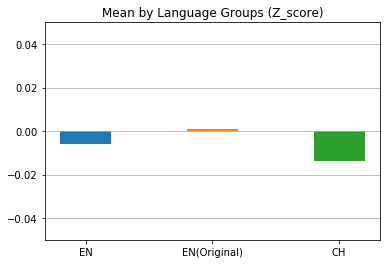

In [284]:
#Mean of means (all z scores)
print("En mean, std", np.average(ena_z), np.std(ena_z))
print("(Original) EN mean, std",np.average(norm_scores), np.std(norm_scores))
print("Ch mean, std",np.average(cha_z), np.std(cha_z))

plt.bar(1, np.average(ena_z), 0.4)
plt.bar(2, np.average(norm_scores), 0.4)
plt.bar(3, np.average(cha_z), 0.4)
plt.grid(axis='y')
plt.xticks((1,2,3), ('EN', 'EN(Original)','CH'))
plt.ylim(-0.05,0.05)
plt.title('Mean by Language Groups (Z_score)')
plt.show()

In [285]:
print("T-tests")
print(stats.ttest_rel(ena_z, cha_z))
print(stats.ttest_ind(ena_z,cha_z))
print(stats.kruskal(ena_z,cha_z))

print(stats.ttest_rel(ena_z, norm_scores))
print(stats.ttest_ind(ena_z, norm_scores))
print(stats.kruskal(ena_z,norm_scores))


print()
print("ANOVAs")
print(stats.stats.f_oneway(ena_z, norm_scores, cha_z))


T-tests
Ttest_relResult(statistic=0.31618752904945058, pvalue=0.75197032009616738)
Ttest_indResult(statistic=0.19494277969571705, pvalue=0.84547079771060885)
KruskalResult(statistic=0.19417221759613312, pvalue=0.65946656766756351)
Ttest_relResult(statistic=-0.3805264051878543, pvalue=0.70368960293903315)
Ttest_indResult(statistic=-0.17114606367102839, pvalue=0.8641378181667444)
KruskalResult(statistic=0.0012474049399315845, pvalue=0.97182567574031209)

ANOVAs
F_onewayResult(statistic=0.067067454295751894, pvalue=0.93513446113211363)


* No meaningful difference in means (z scores)

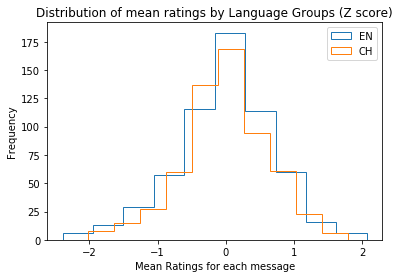

In [262]:
plt.hist(ena_z, histtype='step', rwidth=0.9, label="EN")
# plt.hist(norm_scores, histtype='step', rwidth=0.9, label="EN(Original)")
plt.hist(cha_z, histtype='step', rwidth=0.9, label="CH")
plt.legend()
plt.title("Distribution of mean ratings by Language Groups (Z score)")
plt.xlabel("Mean Ratings for each message")
plt.ylabel("Frequency")
plt.show()

### 2-2. Correlation

LinregressResult(slope=0.55521596487438185, intercept=-0.010310097816618411, rvalue=0.62412331631130213, pvalue=4.2723058607686825e-66, stderr=0.028423211052505389)


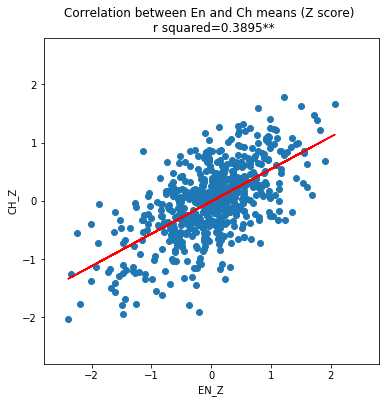

In [266]:
# Correlation between mean ratings by Language Groups (Z score)
plt.figure(figsize=(6,6))

#EN vs. CH
plt.scatter(ena_z, cha_z)
print(stats.linregress(ena_z,cha_z))
slope,intercept, rvalue=stats.linregress(ena_z,cha_z)[:3]
plt.ylim(-2.8,2.8)
plt.xlim(-2.8,2.8)
plt.xlabel("EN_Z")
plt.ylabel("CH_Z")

plt.plot(ena_z, slope*ena_z+intercept, 'r')
plt.title("Correlation between En and Ch means (Z score) \n r squared={}**".format(round(rvalue**2, 4)))


LinregressResult(slope=0.84439817870130796, intercept=0.0062633637663051626, rvalue=0.79893667043742922, pvalue=3.6038031588354357e-134, stderr=0.025993138030149444)
600


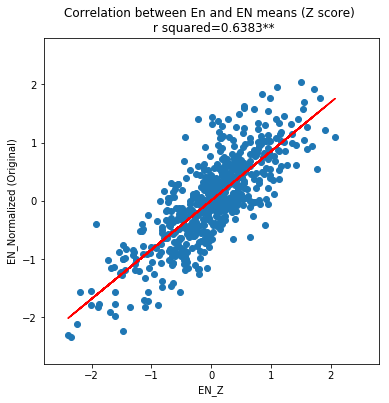

In [293]:
# Correlation between mean ratings by Language Groups (Z score)

plt.figure(figsize=(6,6))

plt.scatter(ena_z,norm_scores)
print(stats.linregress(ena_z,norm_scores))
slope,intercept, rvalue=stats.linregress(ena_z,norm_scores)[:3]
plt.ylim(-2.8,2.8)
plt.xlim(-2.8,2.8)
plt.xlabel("EN_Z")
plt.ylabel("EN_Normalized (Original)")

print(len(x))
plt.plot(ena_z, slope*ena_z+intercept, 'r')
plt.title("Correlation between En and EN means (Z score) \n r squared={}**".format(round(rvalue**2, 4)))


# 3. Identifying Discrepancy Set

### 3-1. Extract the messages that showed big differences in ratings between differnt language groups

Procedure
- Examine the mean differences between each pair of the language groups (e.g., En vs. Ch)
- Convert the differences to z scores (Stardarized)
- Find outliers which are situated in both ends (about 10~20% of messages)

In [299]:
# En vs. Ch
a= ena_z-cha_z
mean_y = np.mean(a)
stdev_y = np.std(a)
z_scores = [(y - mean_y) / stdev_y for y in a]
enchp=z_scores
# print(enchp)

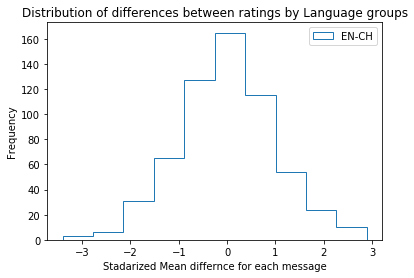

In [300]:
# Distribution Plot of mean differences 

plt.hist(enchp, histtype='step', rwidth=0.9, label="EN-CH")
# plt.hist(kochp, histtype='step', rwidth=0.9, label="KO-CH")

plt.legend()
plt.title("Distribution of differences between ratings by Language groups")
plt.xlabel("Stadarized Mean differnce for each message")
plt.ylabel("Frequency")

### 3-2. 10% from each end (600 X 10% X 2 = 120 sentences) ~ different_set

In [314]:
label_d=[]
different_set=[]
for i in range(len(z_scores)):
    if z_scores[i] < -1.28:
        label_d.append(1)
        different_set.append(i)
    elif z_scores[i]>1.28:
        label_d.append(1)
        different_set.append(i)

    else:
        label_d.append(0)

# print(label_d)
print(different_set)
print(sum(label_d))


[2, 3, 4, 6, 8, 15, 17, 20, 27, 28, 29, 32, 34, 40, 45, 46, 48, 49, 55, 59, 60, 61, 64, 71, 73, 76, 83, 107, 123, 128, 141, 143, 150, 151, 152, 163, 167, 169, 172, 173, 181, 184, 197, 199, 201, 203, 206, 207, 209, 210, 211, 216, 217, 218, 220, 227, 234, 246, 251, 254, 255, 259, 263, 264, 265, 266, 267, 271, 272, 280, 282, 285, 290, 293, 306, 307, 311, 317, 321, 327, 331, 335, 340, 342, 367, 375, 401, 404, 406, 413, 414, 429, 435, 441, 456, 463, 477, 480, 481, 484, 485, 490, 492, 509, 510, 512, 515, 519, 522, 547, 550, 551, 555, 558, 574, 575, 577, 582, 584, 596]
120


### 3-3. Among 120 msgs, only the messages have different direction (i.e., en>0, ch < 0//  en< 0, ch >0) ~ diff_direction -> total 67 messages left

In [330]:
from politeness.api_util import get_scores_strategies_token_indices

diff_direction=[]
diff_direction_label=[]
diff_strategies=[]
for i in range(600):
    if i not in different_set:
        diff_direction_label.append(0)
    elif i in different_set:
        e=pol600[i]['en_mean_z']
        c=pol600[i]['ch_mean_z']
        if (e>0 and c<0) or (e<0 and c>0):
            diff_direction.append(i)
            diff_direction_label.append(1)

            print("En_mean_z: ", e) 
            print("Ch_mean_z: ",c)
            print(pol600[i]['request'])
                
            t=get_scores_strategies_token_indices(pol600[i]['request'])
            print("Politeness Score: ", t['score_polite'])
            print(t['strategies'])
            print("=================================")
            diff_strategies.append(t['strategies'])
        else:
            diff_direction_label.append(0)

            

En_mean_z:  -0.107089890339
Ch_mean_z:  0.781230599551
May I also ask how CheckUser became involved in the matter? To justify such a use of computer records, surely someone needs to invoke a due process of some kind for the action to be justified?
Politeness Score:  0.415204182322
['Factuality', '1st person', 'HASHEDGE']
En_mean_z:  0.217791722641
Ch_mean_z:  -0.607046192608
Regarding <url>, <url> says not to redlink in See also (asking people to also see something non-existing would be strange). Are you planning an article or misspelled an existing article?
Politeness Score:  0.562952681801
['2nd person', 'HASNEGATIVE']
En_mean_z:  0.229083557449
Ch_mean_z:  -1.33588167102
I think we're going to just have to agree to disagree on whether it is a sub genre or fusion then! Can we at least agree to leave the three genres on Dookie as they are?
Politeness Score:  0.462449784941
['Hedges', '1st person pl.', '1st person start', 'HASHEDGE', 'HASNEGATIVE']
En_mean_z:  1.22795433273
Ch_mean_z: 

Politeness Score:  0.590378727243
['Hedges', '1st person', '2nd person', 'HASHEDGE', 'HASPOSITIVE']
En_mean_z:  0.726764024585
Ch_mean_z:  -0.230666713398
I will have to hunt out my albums and take a look. Do you mean something like a photographer's credit?
Politeness Score:  0.651528975729
['1st person', '1st person start', '2nd person', 'HASPOSITIVE']
En_mean_z:  1.35135849209
Ch_mean_z:  -0.195173053535
Thanks for adding that ref to <url>. I don't suppose your copy of Conway's says anything about the roles and fates of ''Schleswig-Holstein'' or ''Schleisen''?
Politeness Score:  0.480586357408
['Gratitude', '1st person start', '2nd person', 'HASHEDGE']
En_mean_z:  -0.434724182861
Ch_mean_z:  0.340047465342
Yes, I appreciate that my edits were not the best, but they are currently the best available in Wikipedia for guiding readers in understanding there the emergence of the legal systems of the United Kingdom. Do You have a better suggestion?
Politeness Score:  0.625527093959
['Gratit

Politeness Score:  0.563069086517
['1st person start', '2nd person', 'HASHEDGE', 'HASNEGATIVE']
En_mean_z:  -0.435166266775
Ch_mean_z:  0.667168392987
This is starting to almost feel like harassment. Perhaps we should take this to a mediation committee?
Politeness Score:  0.553598682417
['1st person pl.', 'HASHEDGE', 'HASPOSITIVE', 'HASNEGATIVE']
En_mean_z:  0.800208548576
Ch_mean_z:  -0.336340363122
Hi, I noticed on 'url' you mentioned its Alexa traffic rank.  How do you find out the Alexa traffic rank of something?
Politeness Score:  0.587206608204
['1st person', '2nd person', 'Indirect (greeting)', 'Direct question']
En_mean_z:  -0.6038449642
Ch_mean_z:  0.153610580056
I presume you haven't obliterated them completely, because that would be to be editorialise enormously. Where have you put them instead?
Politeness Score:  0.454898487565
['1st person start', '2nd person', 'HASNEGATIVE']
En_mean_z:  -0.033797343669
Ch_mean_z:  0.878742841423
I must be missing something here.  Would yo

In [331]:
# print(len(diff_direction))
# print(diff_direction_label)
# print(sum(diff_direction_label))
# print(len(diff_direction_label))
codings['different_label_set']=diff_direction_label

In [338]:
print(diff_direction)
print(len(diff_direction))

[4, 17, 20, 29, 34, 40, 45, 46, 48, 59, 60, 61, 71, 73, 76, 83, 107, 123, 151, 152, 167, 169, 173, 184, 206, 207, 216, 218, 220, 227, 234, 246, 254, 263, 265, 267, 272, 282, 311, 321, 327, 340, 342, 404, 406, 413, 414, 429, 435, 456, 463, 477, 480, 490, 492, 509, 510, 512, 519, 522, 547, 551, 555, 558, 575, 582, 584]
67


### 3-4. Strategies found in differernt_direction_set

In [349]:
def concatList(data):
    results = []
    for rec in data:
        if type(rec) == list:
            results += rec
            results = concatList(results)
        else:
            results.append(rec)
    return results

concatList(diff_strategies)    
from collections import Counter
t=Counter(concatList(diff_strategies))
print(t.most_common())
t1=t.most_common()


[('2nd person', 49), ('1st person', 27), ('HASHEDGE', 26), ('HASPOSITIVE', 23), ('1st person start', 22), ('HASNEGATIVE', 21), ('SUBJUNCTIVE', 16), ('Hedges', 15), ('Please', 12), ('Direct question', 10), ('Indirect (greeting)', 10), ('INDICATIVE', 9), ('Direct start', 7), ('Gratitude', 5), ('1st person pl.', 4), ('2nd person start', 3), ('Factuality', 2), ('Apologizing', 1), ('Please start', 1)]


('2nd person', '1st person', 'HASHEDGE', 'HASPOSITIVE', '1st person start', 'HASNEGATIVE', 'SUBJUNCTIVE', 'Hedges', 'Please', 'Direct question', 'Indirect (greeting)', 'INDICATIVE', 'Direct start', 'Gratitude', '1st person pl.', '2nd person start', 'Factuality', 'Apologizing', 'Please start') (49, 27, 26, 23, 22, 21, 16, 15, 12, 10, 10, 9, 7, 5, 4, 3, 2, 1, 1)


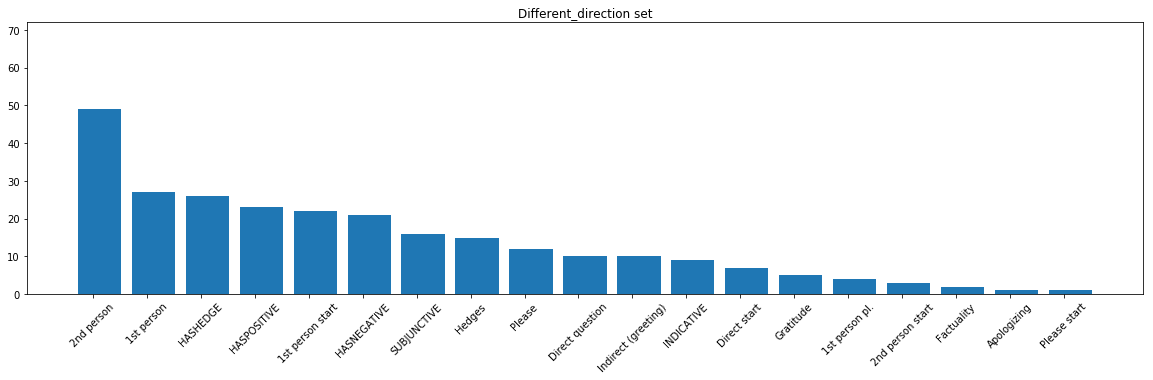

In [352]:
plt.figure(figsize=(20,5))

labels, values=zip(*t1)
plt.bar(np.arange(len(labels))+0.12, values, label="EN<CH")
plt.title("Different_direction set")
plt.xticks(np.arange(len(labels)),labels, rotation=45)
plt.ylim(0, 72)
print(labels, values)
plt.show()


### 3-5. Simple Classifier to detect 'different_label_set'

In [340]:
from sklearn import linear_model
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(codings['Request'], codings['different_label_set'])

In [353]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [343]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(codings['Request'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [345]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(codings['Request'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=5000)
tfidf_vect_ngram.fit(codings['Request'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [347]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [350]:
# # Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)


NB, Count Vectors:  0.793333333333
NB, WordLevel TF-IDF:  0.826666666667
NB, N-Gram Vectors:  0.826666666667
LR, Count Vectors:  0.826666666667
LR, WordLevel TF-IDF:  0.826666666667
LR, N-Gram Vectors:  0.826666666667


In [351]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

# SVM on Count Vectors
accuracy = train_model(svm.LinearSVC(), xtrain_count, train_y, xvalid_count)
print("SVM, Count Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.826666666667
SVM, Count Vectors:  0.8


# 4. Categorizing by Strategies

In [390]:
import json
import pprint
    
with open("zscore_sort_in_strategies.json") as fin:
    t = fin.read()

data = json.loads(t)
# pprint.pprint(data)

In [359]:
print(len(data))
print(data.keys())

20
dict_keys(['2nd person', 'HASHEDGE', 'HASPOSITIVE', 'Direct question', 'Factuality', 'SUBJUNCTIVE', 'HASNEGATIVE', '1st person', 'Hedges', 'Deference', '1st person pl.', '1st person start', 'Gratitude', 'Direct start', 'Indirect (greeting)', 'Please', 'Apologizing', 'INDICATIVE', '2nd person start', 'Please start'])


In [370]:
data_np = {}
for strategy, sentences in data.items():
#     print(strategy, sentences)
    temp_data = np.zeros((len(sentences), 2))
#     print(temp_data)
    for i, sentence in enumerate(sentences):
        temp_data[i][0] = sentence["ch_mean"]
        temp_data[i][1] = sentence["en_mean"]
#         print(temp_data)
    data_np[strategy] = temp_data
# print(data_np.items())

### 4-1. T-Tests and Correlations between EN and CH ratings in each strategy

In [376]:
from scipy.stats import pearsonr

for strategy, arr in data_np.items():
    ttest_result = stats.ttest_ind(arr[:, 0], arr[:, 1])
    print(f"{strategy}")
    print("EN mean: ", np.mean(arr[:, 1]).round(3), "CH mean: ", np.mean(arr[:, 0]).round(3))
    print(ttest_result)
    corr=stats.pearsonr(arr[:, 0], arr[:, 1])
    print(corr)
    print("==================================")

2nd person
EN mean:  0.025 CH mean:  0.051
Ttest_indResult(statistic=0.56812604879814033, pvalue=0.57009977840848802)
(0.61061951885641363, 8.7940606868442352e-45)
HASHEDGE
EN mean:  0.022 CH mean:  0.028
Ttest_indResult(statistic=0.10041503574333355, pvalue=0.92006539545548172)
(0.54510317319352386, 7.108121416222303e-17)
HASPOSITIVE
EN mean:  0.074 CH mean:  0.078
Ttest_indResult(statistic=0.05964340829905148, pvalue=0.95246310037116078)
(0.64456027813713856, 2.4576271212683712e-31)
Direct question
EN mean:  -0.278 CH mean:  -0.32
Ttest_indResult(statistic=-0.50255345274566565, pvalue=0.61572784371730704)
(0.61164751688831731, 4.4870108865798416e-14)
Factuality
EN mean:  -0.483 CH mean:  -0.196
Ttest_indResult(statistic=1.3464321537624344, pvalue=0.18476057764906692)
(0.61864613834590854, 0.0012705249470196236)
SUBJUNCTIVE
EN mean:  0.079 CH mean:  0.381
Ttest_indResult(statistic=2.8284098495059387, pvalue=0.0052272576221571018)
(0.66167486179689128, 2.246524734344877e-12)
HASNEGATIV

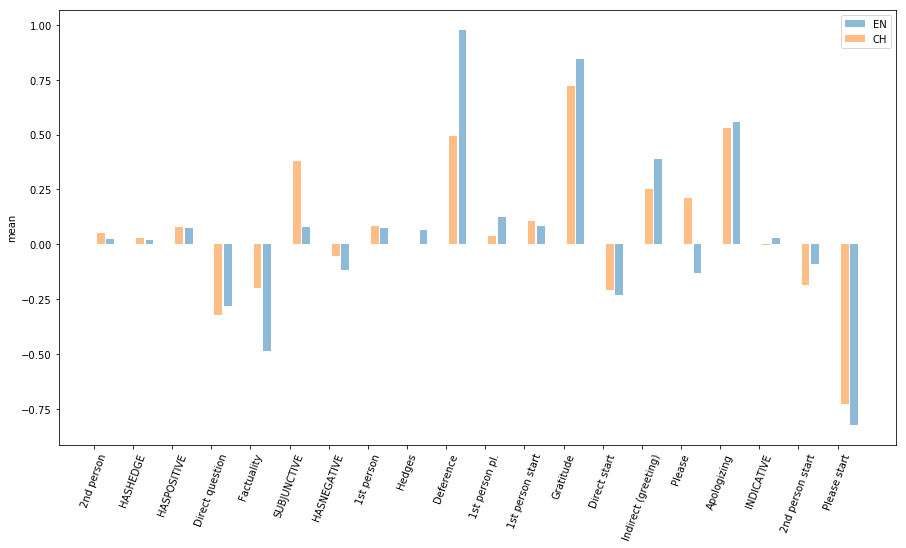

In [383]:
fig, ax = plt.subplots()

fig.set_size_inches((15, 8))

plt.xticks(rotation=70)

keys = []
ch_vals = []
en_vals = []
for strategy, arr in data_np.items():
    keys.append(strategy)
    ch_vals.append(arr[:, 0].mean())
    en_vals.append(arr[:, 1].mean())

ch_vals = np.array(ch_vals)
en_vals = np.array(en_vals)
y_pos = np.arange(len(keys))
ax.bar(y_pos+0.12, en_vals, width=0.2, align='edge', alpha=0.5, label="EN")
ax.bar(y_pos-0.12, ch_vals, width=0.2, align='edge', alpha=0.5, label="CH")

ax.set_xticks(y_pos - 0.2)
ax.set_xticklabels(keys)
ax.set_ylabel('mean')
ax.legend()

plt.show()

In [388]:
diff_strategy=[]

for strategy, arr in data_np.items():
    stat, pvalue = stats.ttest_ind(arr[:, 0], arr[:, 1])
    rscore,pvalue2=stats.pearsonr(arr[:, 0], arr[:, 1])
    
#     print(pvalue)
    if pvalue < 0.1:
        print("based on t test")
        print(f"{strategy}")
        diff_strategy.append(strategy)
        print("EN mean of means", np.mean(arr[:, 1]))
        print("CH mean of means", np.mean(arr[:, 0]))
        print("t test p value", pvalue)
        print("")
    if pvalue2 > 0.05:
        print("based on correlation")
        print(f"{strategy}")
        diff_strategy.append(strategy)
        print("EN mean of means", np.mean(arr[:, 1]))
        print("CH mean of means", np.mean(arr[:, 0]))
        print("correlation p value", pvalue2)
        print("")

print(diff_strategy)
    

based on t test
SUBJUNCTIVE
EN mean of means 0.0790239535272
CH mean of means 0.380661094117
t test p value 0.00522725762216

based on t test
Deference
EN mean of means 0.97761565778
CH mean of means 0.494953796268
t test p value 0.0826263115107

based on correlation
Deference
EN mean of means 0.97761565778
CH mean of means 0.494953796268
correlation p value 0.18306499501

based on correlation
Gratitude
EN mean of means 0.844300632876
CH mean of means 0.722626225602
correlation p value 0.507851153016

based on t test
Please
EN mean of means -0.128382678956
CH mean of means 0.211516687845
t test p value 0.0420117020035

based on correlation
Please start
EN mean of means -0.820683469375
CH mean of means -0.723561659455
correlation p value 0.767362873261

['SUBJUNCTIVE', 'Deference', 'Deference', 'Gratitude', 'Please', 'Please start']


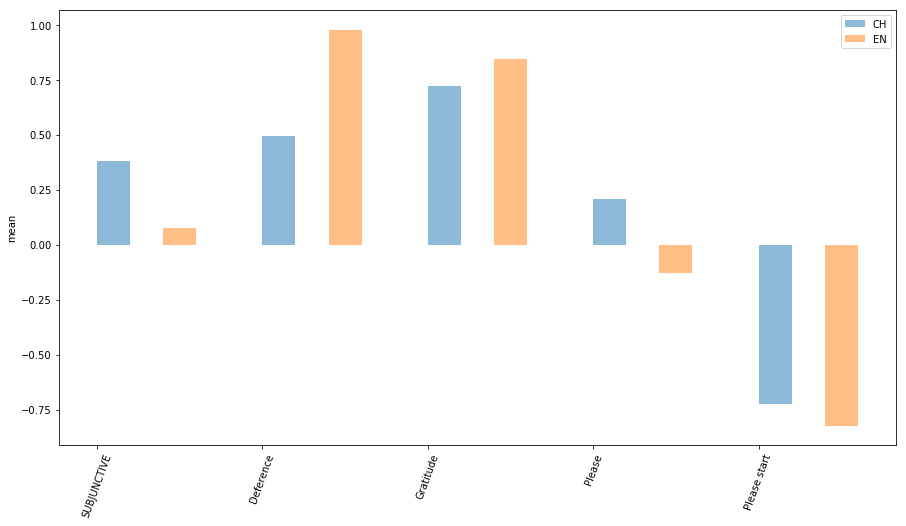

In [387]:
fig, ax = plt.subplots()

fig.set_size_inches((15, 8))

plt.xticks(rotation=70)

keys = []
ch_vals = []
en_vals = []
for strategy, arr in data_np.items():
    if strategy in diff_strategy:
        keys.append(strategy)
        ch_vals.append(arr[:, 0].mean())
        en_vals.append(arr[:, 1].mean())

ch_vals = np.array(ch_vals)
en_vals = np.array(en_vals)
y_pos = np.arange(len(keys))
ax.bar(y_pos-0.2, ch_vals, width=0.2, align='edge', alpha=0.5, label="CH")
ax.bar(y_pos+0.2, en_vals, width=0.2, align='edge', alpha=0.5, label="EN")
ax.set_xticks(y_pos - 0.2)
ax.set_xticklabels(keys)
ax.set_ylabel('mean')
ax.legend()

plt.show()